# Data loading

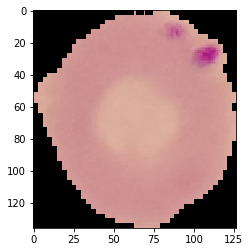

In [5]:
import zipfile
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

path_par = "cell_images/Parasitized.zip"
path_un = "cell_images/Uninfected.zip"

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.png')}

par_img_files = extract_zip_to_memory(path_par)
un_img_files = extract_zip_to_memory(path_un)

images_infected = np.array([np.asarray(Image.open(x)) for x in par_img_files.values()])
images_uninfected = np.array([np.asarray(Image.open(x)) for x in un_img_files.values()])

# Test image
test_img = np.array(images_infected[0])
plt.imshow(test_img)
plt.show()

# Features extraction

# AutoML format conversion 